In [1]:
import numpy as np
from numpy.random import default_rng
from matplotlib import pyplot as plt
import PIL.Image as Image
import ImShow as I
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import pickle
import pandas as pd
from anomalydetection import rpca, DAE, RDAE
rng = default_rng()
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from anomalydetection.utils.noise import add_noise
from anomalydetection.utils.ad import get_stats_, get_stats
import tensorflow as tf

np.printoptions(precision=3, suppress=True)

ModuleNotFoundError: No module named 'ImShow'

In [2]:
x = np.load('./data/data.npk', allow_pickle=True)
y = np.load('./data/y.npk', allow_pickle=True)
anomalies = (y != 4).astype(int)

CONTAMINATION = y[y!=4].size / y.size

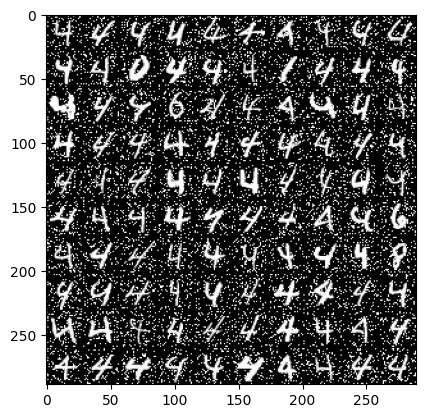

In [5]:
corrupted_x = add_noise(x, 100, 1)
tiled = I.tile_raster_images(X=corrupted_x, img_shape=(28,28), tile_shape=(10, 10),tile_spacing=(1, 1))
plt.imshow(tiled, cmap='gray')
plt.savefig('x.png')

In [39]:
corruptions = [0, 50, 100, 150, 200, 250]
lambdas = sorted([0.005, 0.001, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.02,
           0.03, 0.045, 0.075, 0.1])

In [53]:
name = 'rpca2.pickle'
try:
  with open(name, 'rb') as handle:
    saved = pickle.load(handle)
except Exception as e:
  saved = dict()

# find last corruption and lambda run
idx = 0
corruptions_run = saved.keys()
if len(corruptions_run) > 0:
    last_c = max(corruptions_run)
    idx = corruptions.index(last_c) 
    if len(saved[last_c]['all']['fscore']) == len(lambdas):
        idx += 1
        
for corruption in corruptions[idx:]:
    print()
    print("======================================")
    print(f"Testing for corruption: {corruption}")
    
    seed = np.random.randint(1000)
    corrupted_x = add_noise(x, corruption, seed)
    fnorm_corrupted = np.linalg.norm(corrupted_x)
    fnorm = np.linalg.norm(x)

    if saved.get(corruption) is None:
        saved[corruption] = {
          'seed': seed,
          'all': {
              'sparse': [],
              'costs': [],
              'costs_corrupted': [],
              'fscore': [],
              'precision': [],
              'recall': [],
              'lambdas': []
          },
          'best': {
              'fscore': float('inf')
          }
        }
    
    for lambda_ in lambdas:
        print(f'lambda: {lambda_}')
        if lambda_ in saved[corruption]['all']['lambdas']:
            continue
        model = rpca.rpca(verbose=False, max_iter=1000, lambda_=lambda_, contamination=CONTAMINATION)
        result_x, sparse = model.fit_transform(corrupted_x)
        
        cost_corrupted = np.linalg.norm(np.subtract(corrupted_x, result_x)) / fnorm_corrupted
        cost = np.linalg.norm(np.subtract(x, result_x)) / fnorm

        stats = get_stats_(anomalies, model.labels_)

        saved[corruption]['all']['sparse'].append(sparse)
        saved[corruption]['all']['costs'].append(cost)
        saved[corruption]['all']['costs_corrupted'].append(cost_corrupted)
        saved[corruption]['all']['fscore'].append(stats['fscore'])
        saved[corruption]['all']['precision'].append(stats['precision'])
        saved[corruption]['all']['recall'].append(stats['recall'])
        
        print(f"fscore: {stats['fscore']}, precision: {stats['precision']}, recall: {stats['recall']}")
        
        if stats['fscore'] < saved[corruption]['best']['fscore']:
            saved[corruption]['best']['lambda'] = lambda_
            saved[corruption]['best']['fscore'] = stats['fscore']
            
        with open(name, 'wb') as handle:
            pickle.dump(saved, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    print(f"{saved[corruption]['best']['fscore']} for lambda = {saved[corruption]['best']['lambda']}")

with open(name, 'wb') as handle:
    pickle.dump(saved, handle, protocol=pickle.HIGHEST_PROTOCOL)


Testing for corruption: 50
lambda: 0.001
fscore: 0.14339622641509434, precision: 0.14339622641509434, recall: 0.14339622641509434
lambda: 0.005
fscore: 0.39245283018867927, precision: 0.39245283018867927, recall: 0.39245283018867927
lambda: 0.005
fscore: 0.39245283018867927, precision: 0.39245283018867927, recall: 0.39245283018867927
lambda: 0.0075
fscore: 0.49056603773584906, precision: 0.49056603773584906, recall: 0.49056603773584906
lambda: 0.01
fscore: 0.5169811320754717, precision: 0.5169811320754717, recall: 0.5169811320754717
lambda: 0.0125
fscore: 0.5094339622641509, precision: 0.5094339622641509, recall: 0.5094339622641509
lambda: 0.015
fscore: 0.46037735849056605, precision: 0.46037735849056605, recall: 0.46037735849056605
lambda: 0.02
fscore: 0.4000000000000001, precision: 0.4, recall: 0.4
lambda: 0.03
fscore: 0.16981132075471697, precision: 0.16981132075471697, recall: 0.16981132075471697
lambda: 0.045
fscore: 0.07547169811320754, precision: 0.07547169811320754, recall: 0.

c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
0.0 for lambda = 0.075

Testing for corruption: 100
lambda: 0.001
fscore: 0.12452830188679245, precision: 0.12452830188679245, recall: 0.12452830188679245
lambda: 0.005
fscore: 0.41509433962264153, precision: 0.41509433962264153, recall: 0.41509433962264153
lambda: 0.005
fscore: 0.41509433962264153, precision: 0.41509433962264153, recall: 0.41509433962264153
lambda: 0.0075
fscore: 0.5132075471698113, precision: 0.5132075471698113, recall: 0.5132075471698113
lambda: 0.01
fscore: 0.49433962264150944, precision: 0.49433962264150944, recall: 0.49433962264150944
lambda: 0.0125
fscore: 0.4679245283018868, precision: 0.4679245283018868, recall: 0.4679245283018868
lambda: 0.015
fscore: 0.39245283018867927, precision: 0.39245283018867927, recall: 0.39245283018867927
lambda: 0.02
fscore: 0.2490566037735849, precision: 0.2490566037735849, recall: 0.2490566037735849
lambda: 0.03
fscore: 0.10566037735849057, precision: 0.10566037735849057, recall: 0.10566037

c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
lambda: 0.1


c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
0.0 for lambda = 0.075

Testing for corruption: 150
lambda: 0.001
fscore: 0.10943396226415095, precision: 0.10943396226415095, recall: 0.10943396226415095
lambda: 0.005
fscore: 0.4226415094339623, precision: 0.4226415094339623, recall: 0.4226415094339623
lambda: 0.005
fscore: 0.4226415094339623, precision: 0.4226415094339623, recall: 0.4226415094339623
lambda: 0.0075
fscore: 0.47924528301886793, precision: 0.47924528301886793, recall: 0.47924528301886793
lambda: 0.01
fscore: 0.46037735849056605, precision: 0.46037735849056605, recall: 0.46037735849056605
lambda: 0.0125
fscore: 0.4000000000000001, precision: 0.4, recall: 0.4
lambda: 0.015
fscore: 0.32075471698113206, precision: 0.32075471698113206, recall: 0.32075471698113206
lambda: 0.02
fscore: 0.1471698113207547, precision: 0.1471698113207547, recall: 0.1471698113207547
lambda: 0.03
fscore: 0.045283018867924525, precision: 0.045283018867924525, recall: 0.045283018867924525
lambda: 0.045
fscore

c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
lambda: 0.1


c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
0.0 for lambda = 0.075

Testing for corruption: 200
lambda: 0.001
fscore: 0.12075471698113208, precision: 0.12075471698113208, recall: 0.12075471698113208
lambda: 0.005
fscore: 0.4188679245283019, precision: 0.4188679245283019, recall: 0.4188679245283019
lambda: 0.005
fscore: 0.4188679245283019, precision: 0.4188679245283019, recall: 0.4188679245283019
lambda: 0.0075
fscore: 0.47547169811320755, precision: 0.47547169811320755, recall: 0.47547169811320755
lambda: 0.01
fscore: 0.42641509433962266, precision: 0.42641509433962266, recall: 0.42641509433962266
lambda: 0.0125
fscore: 0.32452830188679244, precision: 0.32452830188679244, recall: 0.32452830188679244
lambda: 0.015
fscore: 0.25660377358490566, precision: 0.25660377358490566, recall: 0.25660377358490566
lambda: 0.02
fscore: 0.09811320754716982, precision: 0.09811320754716982, recall: 0.09811320754716982
lambda: 0.03
fscore: 0.1811320754716981, precision: 0.1811320754716981, recall: 0.1811320

c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
lambda: 0.1


c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
0.0 for lambda = 0.075

Testing for corruption: 250
lambda: 0.001
fscore: 0.1169811320754717, precision: 0.1169811320754717, recall: 0.1169811320754717
lambda: 0.005
fscore: 0.3886792452830189, precision: 0.3886792452830189, recall: 0.3886792452830189
lambda: 0.005
fscore: 0.3886792452830189, precision: 0.3886792452830189, recall: 0.3886792452830189
lambda: 0.0075
fscore: 0.4377358490566038, precision: 0.4377358490566038, recall: 0.4377358490566038
lambda: 0.01
fscore: 0.4037735849056604, precision: 0.4037735849056604, recall: 0.4037735849056604
lambda: 0.0125
fscore: 0.3018867924528302, precision: 0.3018867924528302, recall: 0.3018867924528302
lambda: 0.015
fscore: 0.18867924528301885, precision: 0.18867924528301888, recall: 0.18867924528301888
lambda: 0.02
fscore: 0.07547169811320754, precision: 0.07547169811320754, recall: 0.07547169811320754
lambda: 0.03
fscore: 0.24528301886792453, precision: 0.24528301886792453, recall: 0.24528301886792453

c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
lambda: 0.1


c:\users\gblan\desktop\restored\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fscore: 0.0, precision: 0.0, recall: 0.0
0.0 for lambda = 0.075


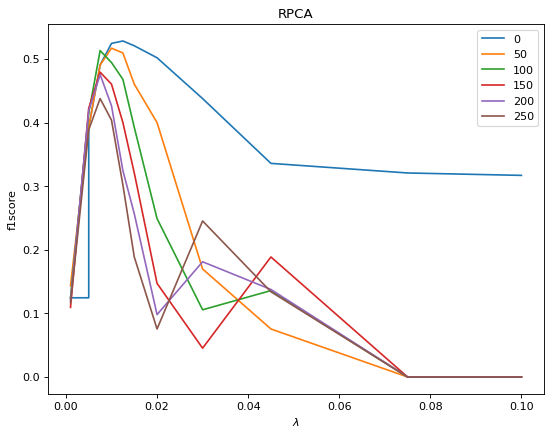

In [68]:
figure(figsize=(8, 6), dpi=80)

for c in corruptions:
    plt.plot(lambdas, saved[c]['all']['fscore'], label=c)
plt.title('RPCA')
plt.legend()
plt.ylabel('f1score')
plt.xlabel('$\lambda$')
plt.show()

<Figure size 1440x1080 with 0 Axes>

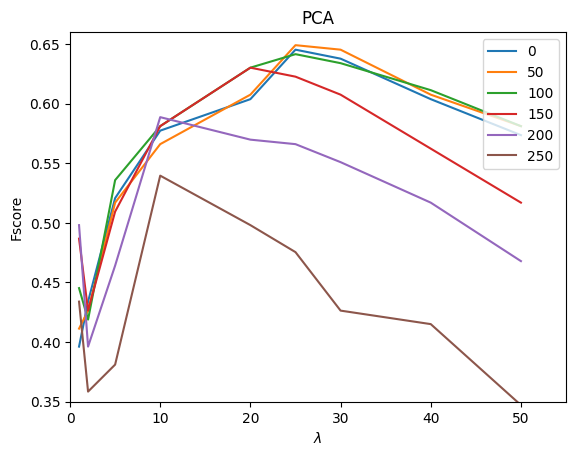

In [4]:
n_components = [1, 2, 5, 10, 20, 25, 30, 40, 50]
corruptions = [0, 50, 100, 150, 200, 250]


scores_pca = dict()

for cr in corruptions:
    scores_pca[cr] = {
        "fscore": [],
    }
    for nc in n_components:
        x_corrupted = add_noise(x, cr, 1)
        
        pca = PCA(n_components=nc, svd_solver='full')
        pca.fit_transform(x_corrupted)

        x_redused = np.dot(x_corrupted - pca.mean_, pca.components_.T)
        x_inversed = np.dot(x_redused, pca.components_) + pca.mean_

        stats = get_stats(x - x_inversed, anomalies, CONTAMINATION)

        scores_pca[cr]['fscore'].append(stats['fscore'])
        #print(stats['fscore'])
        
figure(figsize=(8, 6), dpi=180)

fig, ax = plt.subplots(1)
for cr in corruptions:
    fscore = scores_pca[cr]["fscore"]
    ax.plot(n_components, fscore, label=cr)

figure(figsize=(8, 6), dpi=180)

fig, ax = plt.subplots(1)
for cr in corruptions:
    fscore = scores_pca[cr]["fscore"]
    ax.plot(n_components, fscore, label=cr)

plt.xlabel('$\lambda$')
plt.ylabel('Fscore')
plt.ylim([0.35, 0.66])
plt.xlim([0, 55])
plt.legend(loc='upper right')
plt.title('PCA')
plt.show()

In [ ]:
ot = 20
it = 25
bs = 100
lr = 0.001
drop = 0

lambdas = sorted([0.001, 0.01, 0.1, 0.25, 0.5, 1, 10, 25, 50])
corruptions = [0, 50, 100, 150, 200, 250]

all_scores2 = []
LS2 = []
SS2 = []
for c in corruptions:
    seed = np.random.randint(1000)
    corrupted_x = add_noise(x, c, seed)

    scores = []
    LS1 = []
    SS1 = []
    for l in lambdas:
        print(f"Lambda: {l} Corruption: {c}")
        model = RDAE(encoder_layer_size=[784, 392, 196], decoder_layer_size=[392, 784], shrink='l1',
            activation_function='sigmoid', regularizer='', dropout=drop, verbose=False, lambda_=l)
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr))
        L, S = model.fit_transform(corrupted_x, batch_size=bs, inner_iteration=it, outer_iteration=ot)

        stats = get_stats(S,anomalies, CONTAMINATION)

        del model
        tf.keras.backend.clear_session()
        gc.collect()

        scores.append(stats['fscore'])
        LS1.append(L)
        SS1.append(S)
        print(f" fscore: {stats['fscore']}")
    all_scores2.append(scores)
    LS2.append(LS1)
    SS2.append(SS1)
    
figure(figsize=(8, 6), dpi=80)

for i in range(len(corruptions)):
    plt.plot(lambdas, np.append(final_scores2[i], final_scores[i]), label=corruptions[i])
plt.title('RDAE')
plt.legend()
plt.ylabel('f1score')
plt.xlabel('$\lambda$')
plt.show()